In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import string
from nltk.corpus import inaugural

## Question 1

In [2]:
df=pd.read_excel('Election_Data.xlsx','Election_Dataset_Two Classes',index_col=0)

In [3]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [5]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

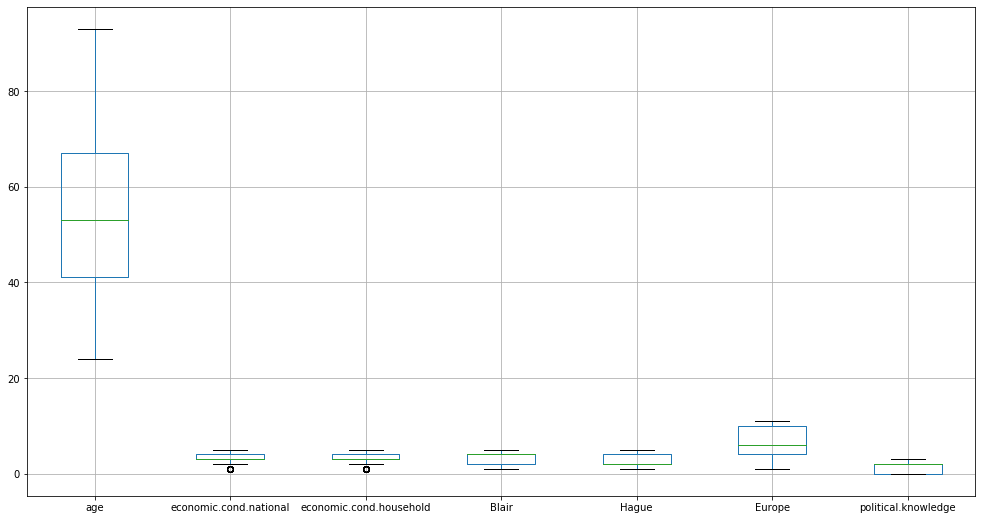

In [6]:
plt.figure(figsize=(17,9))
df.boxplot()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


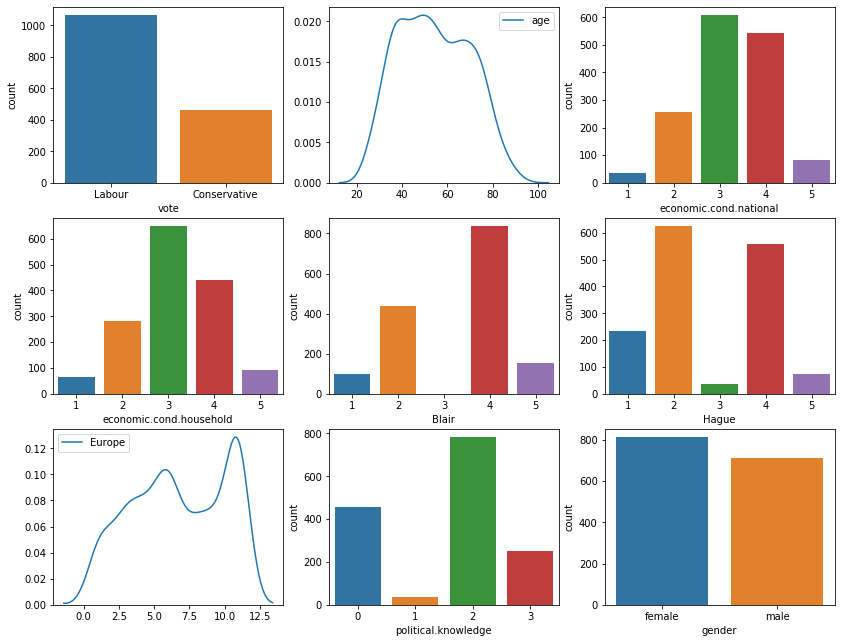

In [8]:
f, ax = plt.subplots(3, 3, figsize=(14,11))
sns.countplot(df['vote'],ax=ax[0,0])
sns.kdeplot(df['age'],ax=ax[0,1])
sns.countplot(df['economic.cond.national'],ax=ax[0,2])
sns.countplot(df['economic.cond.household'],ax=ax[1,0])
sns.countplot(df['Blair'],ax=ax[1,1])
sns.countplot(df['Hague'],ax=ax[1,2])
sns.kdeplot(df['Europe'],ax=ax[2,0])
sns.countplot(df['political.knowledge'],ax=ax[2,1])
sns.countplot(df['gender'],ax=ax[2,2])

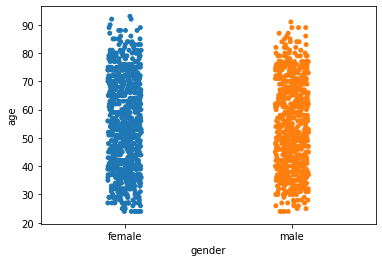

In [9]:
sns.stripplot(df['gender'],df['age'])

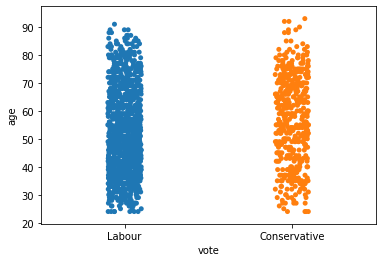

In [10]:
sns.stripplot(df['vote'],df['age'])

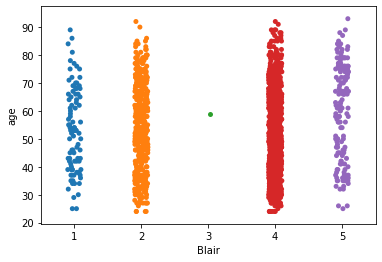

In [11]:
sns.stripplot(df['Blair'],df['age'])

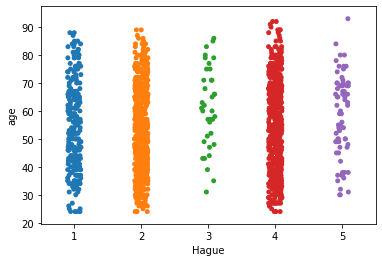

In [12]:
sns.stripplot(df['Hague'],df['age'])

In [13]:
for feature in df.columns: x
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [14]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
for i in df.iloc[:,1:8]:
    df[[i]]=minmax.fit_transform(df[[i]])

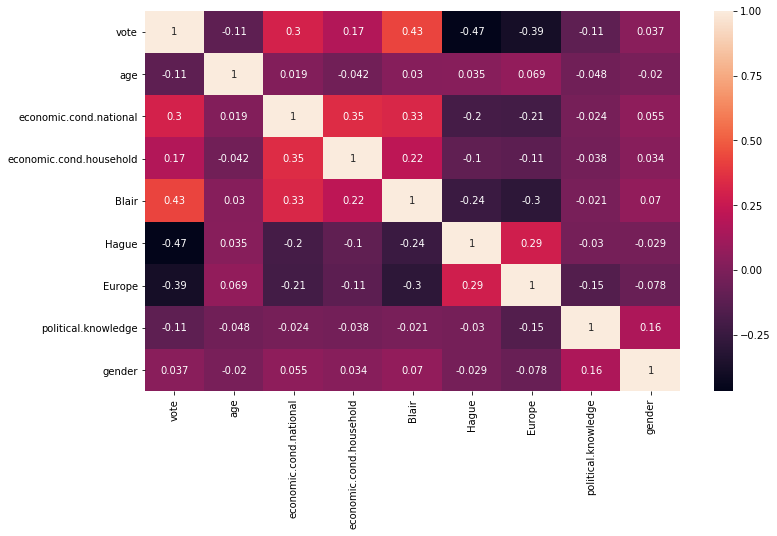

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vote,1525.0,0.697049,0.459685,0.0,0.000000,1.000000,1.000000,1.0
age,1525.0,0.437425,0.227699,0.0,0.246377,0.420290,0.623188,1.0
economic.cond.national,1525.0,0.561475,0.220242,0.0,0.500000,0.500000,0.750000,1.0
economic.cond.household,1525.0,0.535082,0.232488,0.0,0.500000,0.500000,0.750000,1.0
Blair,1525.0,0.583607,0.293706,0.0,0.250000,0.750000,0.750000,1.0
Hague,1525.0,0.436721,0.307676,0.0,0.250000,0.250000,0.750000,1.0
Europe,1525.0,0.572852,0.329754,0.0,0.300000,0.500000,0.900000,1.0
political.knowledge,1525.0,0.514098,0.361105,0.0,0.000000,0.666667,0.666667,1.0
gender,1525.0,0.467541,0.499109,0.0,0.000000,0.000000,1.000000,1.0


In [17]:
x=df.drop(['vote'],axis=1)
y=df['vote']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [19]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
ytrain_predict=model.predict(x_train)
ytest_predict=model.predict(x_test)
print('Logistic Regression model score for Training Data is',model.score(x_train,y_train))
print('Logistic Regression model score for Test Data is',model.score(x_test,y_test))

Logistic Regression model score for Training Data is 0.837863167760075
Logistic Regression model score for Test Data is 0.8209606986899564


AUC: 0.890


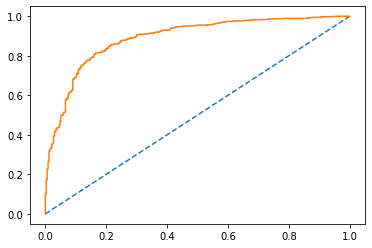

In [21]:
# predict probabilities
probs = model.predict_proba(x_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.890


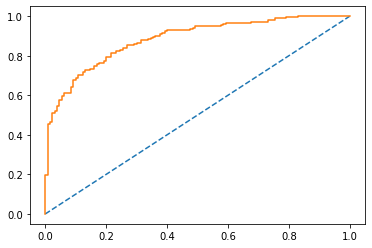

In [22]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [23]:
confusion_matrix(y_train, ytrain_predict)

array([[226, 106],
       [ 67, 668]], dtype=int64)

In [24]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       332
           1       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [25]:
confusion_matrix(y_test, ytest_predict)

array([[ 84,  46],
       [ 36, 292]], dtype=int64)

In [26]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



## LINEAR DISCRIMINANT ANALYSIS

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
ytrain_predict=lda.predict(x_train)
ytest_predict=lda.predict(x_test)
print('Linear Discriminant Analysis training data score is', lda.score(x_train,y_train))
print('Linear Discriminant Analysis test data score is', lda.score(x_test,y_test))

Linear Discriminant Analysis training data score is 0.8369259606373008
Linear Discriminant Analysis test data score is 0.8187772925764192


AUC: 0.889


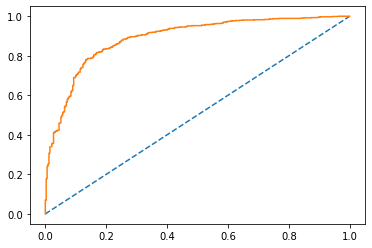

In [28]:
# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.889


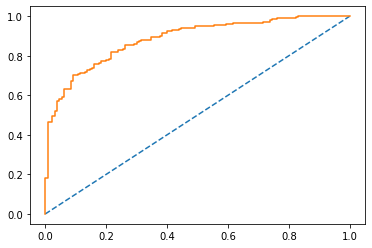

In [29]:
# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [30]:
confusion_matrix(y_train, ytrain_predict)

array([[233,  99],
       [ 75, 660]], dtype=int64)

In [31]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [32]:
confusion_matrix(y_test, ytest_predict)

array([[ 86,  44],
       [ 39, 289]], dtype=int64)

In [33]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



## KNN Algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
ytrain_predict=knn.predict(x_train)
ytest_predict=knn.predict(x_test)
print('KNN Algortihm training data score is', knn.score(x_train,y_train))
print('KNN Algorithm test data score is', knn.score(x_test,y_test))

KNN Algortihm training data score is 0.865979381443299
KNN Algorithm test data score is 0.8253275109170306


AUC: 0.935


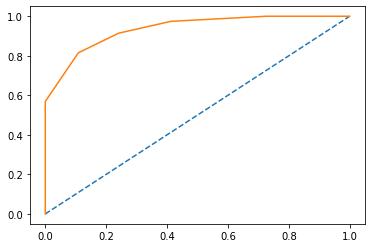

In [35]:
# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.935


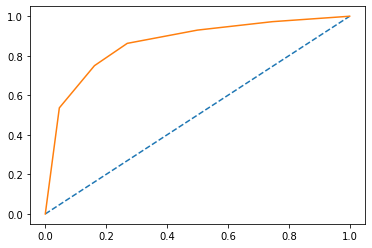

In [36]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [37]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  80],
       [ 63, 672]], dtype=int64)

In [38]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       332
           1       0.89      0.91      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.86      0.87      0.86      1067



In [39]:
confusion_matrix(y_test, ytest_predict)

array([[ 95,  35],
       [ 45, 283]], dtype=int64)

In [40]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       130
           1       0.89      0.86      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



## Naive Bayes Algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(x_train,y_train)
ytrain_predict=NB_model.predict(x_train)
ytest_predict=NB_model.predict(x_test)
print('Naive Bayes Algorithm training data score is', NB_model.score(x_train,y_train))
print('Naive Bayes Algorithm test data score is', NB_model.score(x_test,y_test))

Naive Bayes Algorithm training data score is 0.8331771321462043
Naive Bayes Algorithm test data score is 0.8253275109170306


AUC: 0.886


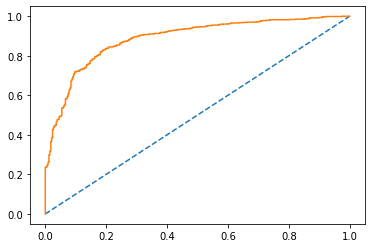

In [42]:
# predict probabilities
probs = NB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.886


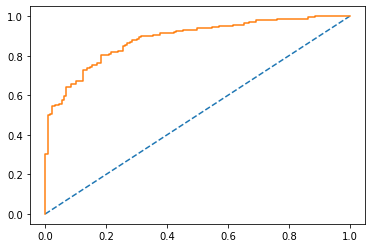

In [43]:
# predict probabilities
probs = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [44]:
confusion_matrix(y_train, ytrain_predict)

array([[240,  92],
       [ 86, 649]], dtype=int64)

In [45]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [46]:
confusion_matrix(y_test, ytest_predict)

array([[ 94,  36],
       [ 44, 284]], dtype=int64)

In [47]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



## SUPPORT VECTOR MACHINE

In [48]:
from sklearn import svm
SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(x_train, y_train)
ytrain_predict=SVM_model.predict(x_train)
ytest_predict=SVM_model.predict(x_test)
print('Support Vector Machine model training data score is', SVM_model.score(x_train,y_train))
print('Support Vector Machine model test data score is', SVM_model.score(x_test,y_test))

Support Vector Machine model training data score is 0.8603561387066542
Support Vector Machine model test data score is 0.8231441048034934


AUC: 0.914


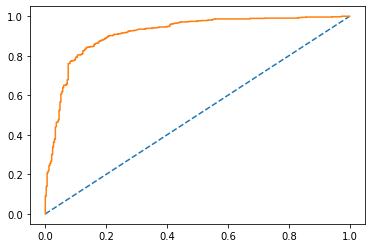

In [49]:
# predict probabilities
probs = SVM_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.914


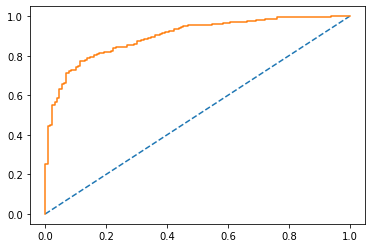

In [50]:
# predict probabilities
probs = SVM_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [51]:
confusion_matrix(y_train, ytrain_predict)

array([[236,  96],
       [ 53, 682]], dtype=int64)

In [52]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       332
           1       0.88      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [53]:
confusion_matrix(y_test, ytest_predict)

array([[ 83,  47],
       [ 34, 294]], dtype=int64)

In [54]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       130
           1       0.86      0.90      0.88       328

    accuracy                           0.82       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(x_train,y_train)
ytrain_predict=rfcl.predict(x_train)
ytest_predict=rfcl.predict(x_test)
print('Random Forest Classifier training data score is', rfcl.score(x_train,y_train))
print('Random Forest Classifier test data score is', rfcl.score(x_test,y_test))

Random Forest Classifier training data score is 0.9990627928772259
Random Forest Classifier test data score is 0.8209606986899564


AUC: 1.000


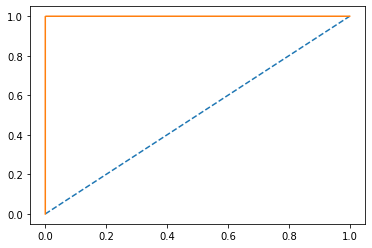

In [56]:
# predict probabilities
probs = rfcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


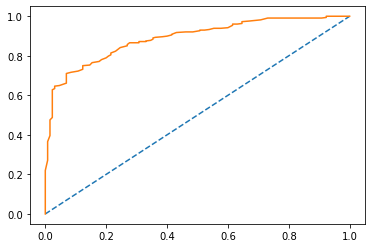

In [57]:
# predict probabilities
probs = rfcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [58]:
confusion_matrix(y_train, ytrain_predict)

array([[331,   1],
       [  0, 735]], dtype=int64)

In [59]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [60]:
confusion_matrix(y_test, ytest_predict)

array([[ 90,  40],
       [ 42, 286]], dtype=int64)

In [61]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [20,30],
    'n_estimators': [100,300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid,cv=5)

In [63]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [64]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 100}

In [65]:
best_grid = grid_search.best_estimator_

In [66]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [68]:
confusion_matrix(y_train, ytrain_predict)

array([[247,  85],
       [ 63, 672]], dtype=int64)

In [69]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       332
           1       0.89      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [70]:
confusion_matrix(y_test, ytest_predict)

array([[ 92,  38],
       [ 40, 288]], dtype=int64)

In [71]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.931


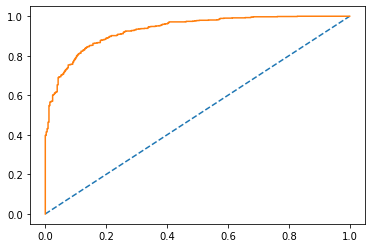

In [72]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.931


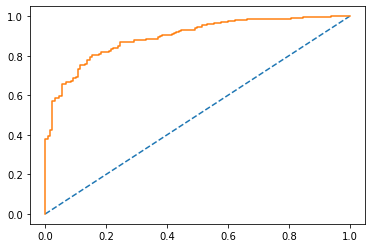

In [73]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)
ytrain_predict=ADB_model.predict(x_train)
ytest_predict=ADB_model.predict(x_test)
print('Adaptive Boosting training data score is', ADB_model.score(x_train,y_train))
print('Adaptive Boosting test data score is', ADB_model.score(x_test,y_test))

Adaptive Boosting training data score is 0.8472352389878163
Adaptive Boosting test data score is 0.8187772925764192


AUC: 0.913


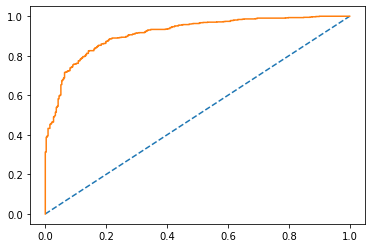

In [75]:
# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.913


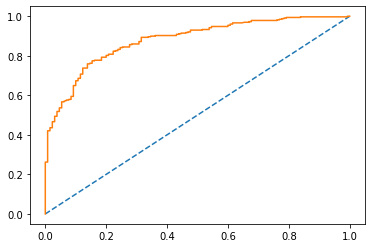

In [76]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [77]:
confusion_matrix(y_train, ytrain_predict)

array([[238,  94],
       [ 69, 666]], dtype=int64)

In [78]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [79]:
confusion_matrix(y_test, ytest_predict)

array([[ 90,  40],
       [ 43, 285]], dtype=int64)

In [80]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



## Extreme Gradient Boosting

In [81]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1)
XGB_model.fit(x_train, y_train)
ytrain_predict=XGB_model.predict(x_train)
ytest_predict=XGB_model.predict(x_test)
print('Extreme Gradient Boosting training data score is', XGB_model.score(x_train,y_train))
print('Extreme Gradient Boosting test data score is', XGB_model.score(x_test,y_test))

Extreme Gradient Boosting training data score is 0.9915651358950328
Extreme Gradient Boosting test data score is 0.8013100436681223


AUC: 1.000


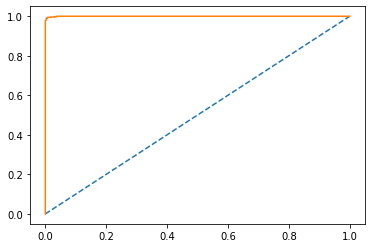

In [82]:
# predict probabilities
probs = XGB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


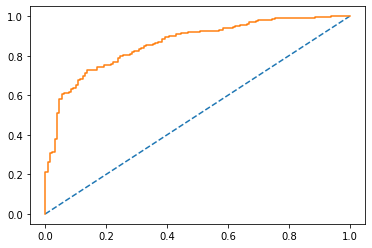

In [83]:
# predict probabilities
probs = XGB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [84]:
confusion_matrix(y_train, ytrain_predict)

array([[327,   5],
       [  4, 731]], dtype=int64)

In [85]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       332
           1       0.99      0.99      0.99       735

    accuracy                           0.99      1067
   macro avg       0.99      0.99      0.99      1067
weighted avg       0.99      0.99      0.99      1067



In [86]:
confusion_matrix(y_test, ytest_predict)

array([[ 88,  42],
       [ 49, 279]], dtype=int64)

In [87]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       130
           1       0.87      0.85      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458



In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  "learning_rate"    : [0.05, 0.10] ,
 "max_depth"        : [ 3, 4,8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.1, 0.2 ,0.4 ],
 "colsample_bytree" : [ 0.3,0.5 ]
}
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1)

grid_search = GridSearchCV(estimator = XGB_model, param_grid = param_grid,cv=5)

In [89]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [90]:
grid_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3}

In [91]:
best_grid = grid_search.best_estimator_

In [92]:
best_grid

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [93]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

AUC: 0.920


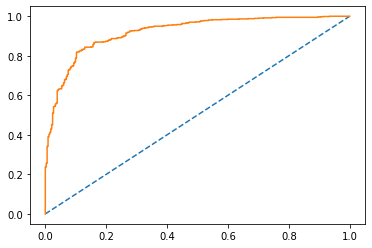

In [94]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.920


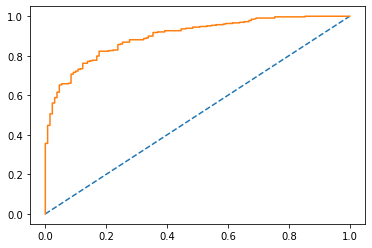

In [95]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [96]:
confusion_matrix(y_train, ytrain_predict)

array([[240,  92],
       [ 57, 678]], dtype=int64)

In [97]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       332
           1       0.88      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [98]:
confusion_matrix(y_test, ytest_predict)

array([[ 88,  42],
       [ 38, 290]], dtype=int64)

In [99]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       130
           1       0.87      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.82       458



## Question 2

In [100]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [101]:
x=inaugural.raw('1941-Roosevelt.txt')
y=inaugural.raw('1961-Kennedy.txt')
z=inaugural.raw('1973-Nixon.txt')

In [102]:
print("Number of sentences in Roosevelt's Speech is",len(nltk.sent_tokenize(x)))
print("Number of words in Roosevelt's Speech is",len(nltk.word_tokenize(x)))
sum=0
wwr=nltk.word_tokenize(x)
for i in wwr:
    sum=sum+len(i)
print("Number of characters in Roosevelt's Speech is",sum)

Number of sentences in Roosevelt's Speech is 68
Number of words in Roosevelt's Speech is 1526
Number of characters in Roosevelt's Speech is 6176


In [103]:
#TOP 3 Words
punc=string.punctuation
punc=punc.split()
punc.append('--')
punc=str(punc)
from nltk.corpus import stopwords
stop = stopwords.words('english')
wordtokens = nltk.word_tokenize(x)
filtered_sentence = []
for w in wordtokens:
    if (w != 'US'):
        filtered_sentence.append(w.lower())   
filtered_sentence = [w for w in filtered_sentence if not w in stop]
filtered_sentence= [w for w in filtered_sentence if not w in punc]
pd.Series(filtered_sentence).value_counts()[:3]

nation    12
know      10
spirit     9
dtype: int64

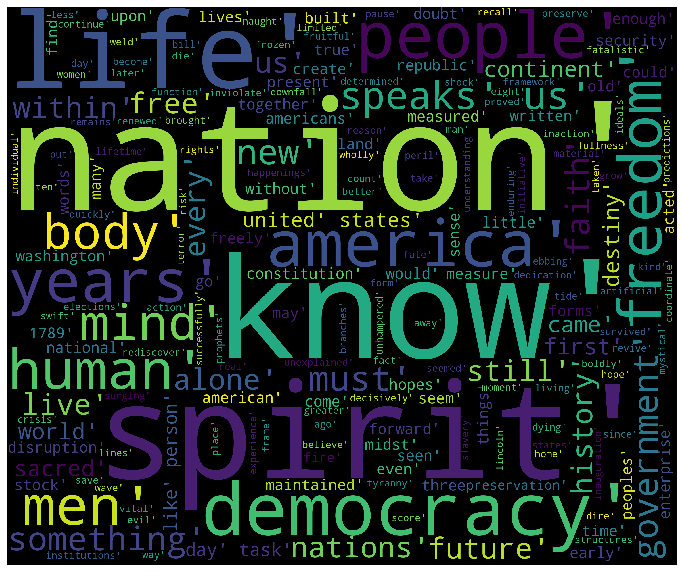

In [104]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(str(filtered_sentence))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [105]:
print("Number of sentences in Kennedy's Speech is",len(nltk.sent_tokenize(y)))
print("Number of words in Kennedy's Speech is",len(nltk.word_tokenize(y)))
sum=0
wwr=nltk.word_tokenize(y)
for i in wwr:
    sum=sum+len(i)
print("Number of characters in Kennedy's Speech is",sum)

Number of sentences in Kennedy's Speech is 52
Number of words in Kennedy's Speech is 1543
Number of characters in Kennedy's Speech is 6206


In [106]:
#TOP 3 Words
punc=string.punctuation
punc=punc.split()
punc.append('--')
punc=str(punc)
from nltk.corpus import stopwords
stop = stopwords.words('english')
wordtokens = nltk.word_tokenize(y)
filtered_sentence = []
for w in wordtokens:
    if (w != 'US'):
        filtered_sentence.append(w.lower())   
filtered_sentence = [w for w in filtered_sentence if not w in stop]
filtered_sentence= [w for w in filtered_sentence if not w in punc]
pd.Series(filtered_sentence).value_counts()[:3]

let      16
us       12
world     8
dtype: int64

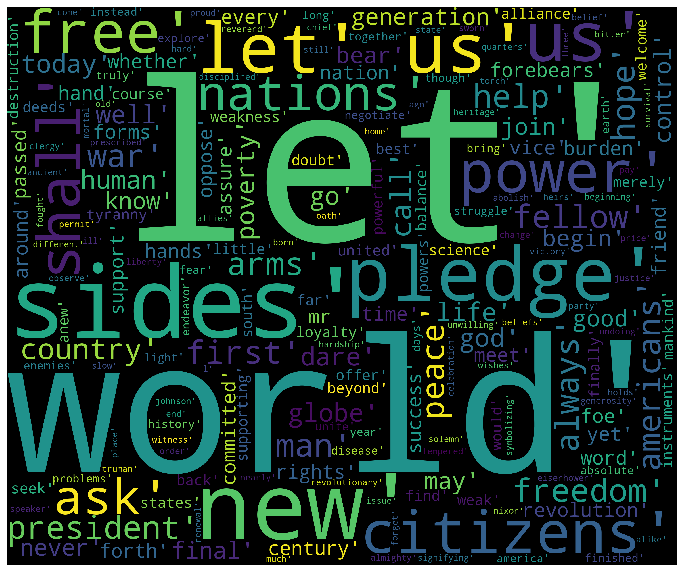

In [107]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(str(filtered_sentence))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [108]:
print("Number of sentences in Nixon's Speech is",len(nltk.sent_tokenize(z)))
print("Number of words in Nixon's Speech is",len(nltk.word_tokenize(z)))
sum=0
wwr=nltk.word_tokenize(y)
for i in wwr:
    sum=sum+len(i)
print("Number of characters in Nixon's Speech is",sum)

Number of sentences in Nixon's Speech is 68
Number of words in Nixon's Speech is 2006
Number of characters in Nixon's Speech is 6206


In [109]:
#TOP 3 Words
punc=string.punctuation
punc=punc.split()
punc.append('--')
punc=str(punc)
from nltk.corpus import stopwords
stop = stopwords.words('english')
wordtokens = nltk.word_tokenize(z)
filtered_sentence = []
for w in wordtokens:
    if (w != 'US'):
        filtered_sentence.append(w.lower())   
filtered_sentence = [w for w in filtered_sentence if not w in stop]
filtered_sentence= [w for w in filtered_sentence if not w in punc]
pd.Series(filtered_sentence).value_counts()[:3]

us         26
let        22
america    21
dtype: int64

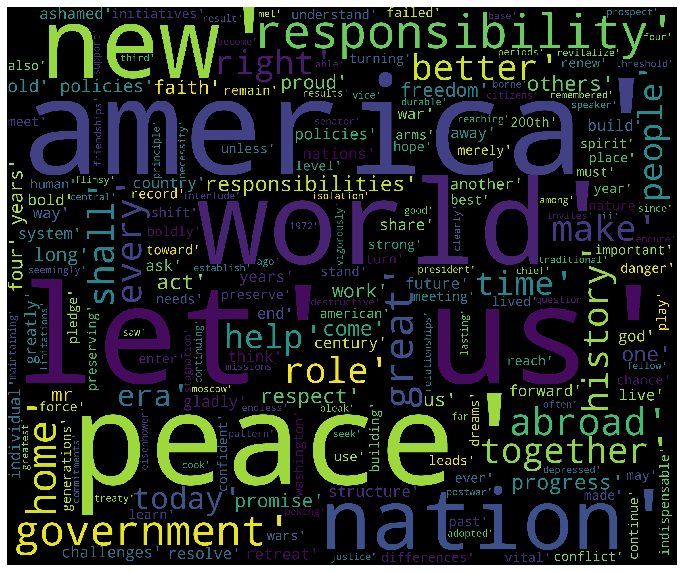

In [110]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(str(filtered_sentence))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()